In [1]:
import numpy as np
from pandas import read_csv
#import matplotlib.pyplot as plt
#%matplotlib inline

In [25]:
def transform_test(df):
    
    df = df.drop(['passenger_count'], axis=1)
    
    # Create new features - dayofweek,hour,month,year
    df['dayofweek'] = df['pickup_datetime'].dt.dayofweek.astype('uint8')
    df['weekend'] = np.where(df.dayofweek < 5,0,1).astype('uint8')
    df = df.drop(['dayofweek'], axis=1)
    df['hour'] = df['pickup_datetime'].dt.hour.astype('uint8')
    #bins = IntervalIndex.from_tuples([(0, 6),
    #                                 (6, 12),
    #                                 (12, 16),
    #                                 (16,24)], closed='left')
    #df['h_class'] = cut(df['hour'], bins, labels=False)
    df['h_class'] = np.where((df['hour'] >= 0) &
                                   (df['hour'] < 6),1,0).astype('uint8')
    df['h_class'] = np.where((df['hour'] >= 6) &
                                   (df['hour'] < 16),2,df['h_class'])
    #df['h_class'] = np.where((df['hour'] >= 12) &
    #                               (df['hour'] < 16),3,df['h_class'])
    df['h_class'] = np.where((df['hour'] >= 16) &
                                   (df['hour'] < 20),3,df['h_class'])
    df['h_class'] = np.where((df['hour'] >= 20) &
                                   (df['hour'] < 24),1,df['h_class'])
    #df = df.drop(['hour'], axis=1)
    # Add feature to saparete the periods with different fare rates
    df['period'] = np.where(df['pickup_datetime'] < '2012-09-01',0,1).astype('uint8')
    
    #train_df['day'] = train_df['pickup_datetime'].dt.day.astype('uint8')
    train_df['month'] = train_df['pickup_datetime'].dt.month.astype('uint8')
    #train_df['year'] = train_df['pickup_datetime'].dt.year.astype('uint16')
    #train_df['holiday'] = 

    # Create features for special rates
    #df['eightpmto6am'] = np.where((df['hour'] >= 6) &
    #                                (df['hour'] < 20),0,1).astype('uint8')

    # HOLIDAYS SHOULD BE INCLUDED IN THE CONDITION
    #df['rushhour'] = np.where((df['hour'] >= 16) &
    #                                (df['hour'] < 20) &
    #                                (df['weekend'] == 0),1,0).astype('uint8')

    
    # Save memory
    df = df.drop(['pickup_datetime'], axis=1)
    #print(train_df.shape)
    #print('Maximum ride distance: %.1f' % train_df['dist'].max())
    return df

In [2]:
def transform_train(train_df):
    
    # Remove missing values
    train_df = train_df.dropna(how = 'any', axis = 'rows')
    
    # Remove key column
    #train_df = train_df.drop(['key'], axis=1)
    
    # Remove absurd passenger_count
    #train_df = train_df[(train_df['passenger_count'] >= 1) &
    #                (train_df['passenger_count'] <= 6)]

    # Remove passenger_count column
    #train_df = train_df.drop(['passenger_count'], axis=1)

    # Remove negative and extreme fare_amount values
    train_df = train_df[(train_df['fare_amount'] >= 2.5) & (train_df['fare_amount'] <= 300)]
    print('Maximum fare_amount: %.1f' % train_df['fare_amount'].max())

    # Remove no displacements
    train_df = train_df[(train_df['pickup_latitude'] != train_df['dropoff_latitude'])]
    train_df = train_df[(train_df['pickup_longitude'] != train_df['dropoff_longitude'])]

    # Remove absurd displacements
    # A fixed value of 0.01 was added to the extreme coordinates in the test set
    # to permit finding neighbors within a radius < 0.01 around
    # pickup and dropoff locations
    train_df = train_df[(train_df['pickup_longitude'] >= lng1min+0.01) &
                        (train_df['pickup_longitude'] <= lng1max+0.01)]
    train_df = train_df[(train_df['dropoff_longitude'] >= lng2min+0.01) &
                        (train_df['dropoff_longitude'] <= lng2max+0.01)]
    train_df = train_df[(train_df['pickup_latitude'] >= lat1min+0.01) &
                        (train_df['pickup_latitude'] <= lat1max+0.01)]
    train_df = train_df[(train_df['dropoff_latitude'] >= lat2min+0.01) &
                        (train_df['dropoff_latitude'] <= lat2max+0.01)]

    # Create new features - dayofweek,hour,month,year
    train_df['dayofweek'] = train_df['pickup_datetime'].dt.dayofweek.astype('uint8')
    train_df['weekend'] = np.where(train_df.dayofweek < 5,0,1).astype('uint8')
    train_df = train_df.drop(['dayofweek'], axis=1)
    train_df['hour'] = train_df['pickup_datetime'].dt.hour.astype('uint8')
    #train_df['hour_circ'] = np.where(train_df['hour'] <= 12,
    #                                 (train_df['hour'] - 0)/12,
    #                                 (24 - train_df['hour'])/12).astype('float32')
    #train_df['sin_hour'] = np.sin(2*np.pi*train_df.hour/24).astype('float32')
    #train_df['cos_hour'] = np.cos(2*np.pi*train_df.hour/24).astype('float32')
    #bins = IntervalIndex.from_tuples([(0, 6),
    #                                 (6, 12),
    #                                 (12, 16),
    #                                 (16,24)], closed='left')
    #train_df['h_class'] = cut(train_df['hour'], bins, labels=False)
    train_df['h_class'] = np.where((train_df['hour'] >= 0) &
                                   (train_df['hour'] < 6),1,0).astype('uint8')
    train_df['h_class'] = np.where((train_df['hour'] >= 6) &
                                   (train_df['hour'] < 16),2,train_df['h_class'])
    #train_df['h_class'] = np.where((train_df['hour'] >= 12) &
    #                               (train_df['hour'] < 16),3,train_df['h_class'])
    train_df['h_class'] = np.where((train_df['hour'] >= 16) &
                                   (train_df['hour'] < 20),3,train_df['h_class'])
    train_df['h_class'] = np.where((train_df['hour'] >= 20) &
                                   (train_df['hour'] < 24),1,train_df['h_class'])
    #train_df['h_class'] = np.where((train_df['hour'] >= 14) &
    #                               (train_df['hour'] < 20),1,0)
    #train_df['day'] = train_df['pickup_datetime'].dt.day.astype('uint8')
    #train_df['month'] = train_df['pickup_datetime'].dt.month.astype('uint8')
    #train_df['year'] = train_df['pickup_datetime'].dt.year.astype('uint16')

    # Create features for special rates
    #train_df['eightpmto6am'] = np.where((train_df['hour'] >= 6) &
    #                                (train_df['hour'] < 20),0,1).astype('uint8')
    #train_df['holiday'] = 
    #train_df['rushhour'] = np.where((train_df['hour'] >= 16) &
    #                                (train_df['hour'] < 20) &
    #                                (train_df['weekend'] == 0),1,0).astype('uint8')
    train_df = train_df.drop(['hour'], axis=1)

    # Create dataframes for the two periods
    train_df['period'] = np.where(train_df['pickup_datetime'] < '2012-09-01',0,1).astype('uint8')
    
    # Save memory
    train_df = train_df.drop(['pickup_datetime'], axis=1)
    print(train_df.shape)
    return train_df

In [ ]:
%%time
#train_df = read_feather('tmp/train100K.feather')
train_df = read_csv('train100K.csv', parse_dates=['pickup_datetime'], infer_datetime_format=True)
print(train_df.shape)

In [3]:
test_df = read_csv('test.csv', parse_dates=['pickup_datetime'], infer_datetime_format=True)

In [4]:
lng1min = test_df.pickup_longitude.min()
lng2min = test_df.dropoff_longitude.min()
lat1min = test_df.pickup_latitude.min()
lat2min = test_df.dropoff_latitude.min()
#
lng1max = test_df.pickup_longitude.max()
lng2max = test_df.dropoff_longitude.max()
lat1max = test_df.pickup_latitude.max()
lat2max = test_df.dropoff_latitude.max()

In [5]:
del test_df

In [ ]:
train_df = transform_train(train_df)
train_df.head()

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97843 entries, 0 to 99999
Data columns (total 12 columns):
key                  97843 non-null object
fare_amount          97843 non-null float64
pickup_longitude     97843 non-null float64
pickup_latitude      97843 non-null float64
dropoff_longitude    97843 non-null float64
dropoff_latitude     97843 non-null float64
passenger_count      97843 non-null int64
weekend              97843 non-null uint8
h_class              97843 non-null uint8
eightpmto6am         97843 non-null uint8
rushhour             97843 non-null uint8
period               97843 non-null uint8
dtypes: float64(5), int64(1), object(1), uint8(5)
memory usage: 6.4+ MB


In [16]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)

In [17]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [18]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

In [26]:
%%time

#define the radius
r2=0.002**2

# Define a subset of rides with common pickup and dropoff positions
# with the condition for the period 1
subset1 = train_df[((train_df.pickup_longitude - (-73.978989))**2 +
                   (train_df.pickup_latitude - (40.761620))**2 < r2) &
                 ((train_df.dropoff_longitude - (-73.963959))**2 +
                   (train_df.dropoff_latitude - (40.770561))**2 < r2) &
                  (train_df.period==1) &
                  (train_df.rushhour==0)]

# with the condition for the period 2
subset2 = train_df[((train_df.pickup_longitude - (-73.978989))**2 +
                   (train_df.pickup_latitude - (40.761620))**2 < r2) &
                 ((train_df.dropoff_longitude - (-73.963959))**2 +
                   (train_df.dropoff_latitude - (40.770561))**2 < r2) &
                  (train_df.period==1) &
                  (train_df.rushhour==1)]
#subset1.fare_amount.mean()
#subset2 = train_df[((train_df.pickup_longitude - (-73.963959))**2 +
#                   (train_df.pickup_latitude - (40.770561))**2 < r2) &
#                 ((train_df.dropoff_longitude - (-73.978989))**2 +
#                   (train_df.dropoff_latitude - (40.761620))**2 < r2)]

CPU times: user 11.1 ms, sys: 2.06 ms, total: 13.2 ms
Wall time: 12.4 ms


In [27]:
print(subset1.shape)
print(subset2.shape)

(15, 12)
(4, 12)


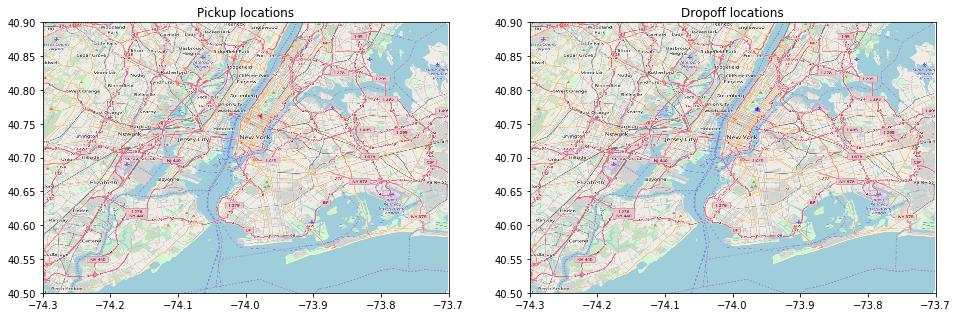

In [28]:
# plot training data on map zoomed in
plot_on_map(subset1, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

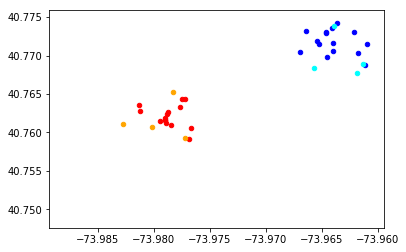

In [29]:
plt.scatter(subset1.pickup_longitude,subset1.pickup_latitude, s=20, c='r')
plt.scatter(subset1.dropoff_longitude,subset1.dropoff_latitude, s=20, c='b')
plt.scatter(subset2.pickup_longitude,subset2.pickup_latitude, s=20, c='orange')
plt.scatter(subset2.dropoff_longitude,subset2.dropoff_latitude, s=20, c='cyan')
plt.show()

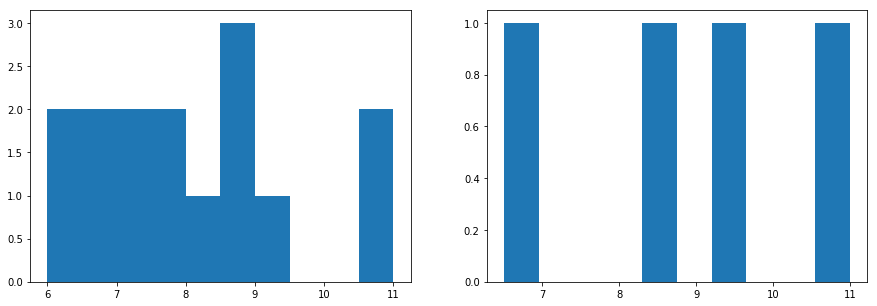

In [30]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.hist(subset1.fare_amount)
ax2 = plt.subplot(122)
ax2.hist(subset2.fare_amount)
plt.show()

In [31]:
subset1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekend,h_class,eightpmto6am,rushhour,period
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0
mean,7.866667,-73.978646,40.762136,-73.963954,40.771762,1.333333,0.333333,2.866667,0.266667,0.0,1.0
std,1.505545,0.001370,0.001414,0.001792,0.001559,1.046536,0.487950,1.355764,0.457738,0.0,0.0
min,6.000000,-73.981300,40.759153,-73.966920,40.768812,1.000000,0.000000,2.000000,0.000000,0.0,1.0
25%,6.750000,-73.979017,40.761364,-73.964924,40.770481,1.000000,0.000000,2.000000,0.000000,0.0,1.0
50%,7.500000,-73.978814,40.761932,-73.964094,40.771680,1.000000,0.000000,2.000000,0.000000,0.0,1.0
75%,8.500000,-73.977567,40.763088,-73.962859,40.773026,1.000000,1.000000,4.000000,0.500000,0.0,1.0
max,11.000000,-73.976640,40.764306,-73.960937,40.774245,5.000000,1.000000,5.000000,1.000000,0.0,1.0


In [32]:
subset2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekend,h_class,eightpmto6am,rushhour,period
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.0,4.0,4.0,4.0,4.0
mean,8.875000,-73.979581,40.761568,-73.963204,40.769745,2.25,0.0,4.0,0.0,1.0,1.0
std,1.887459,0.002457,0.002554,0.002001,0.002792,2.50,0.0,0.0,0.0,0.0,0.0
min,6.500000,-73.982777,40.759247,-73.965705,40.767760,1.00,0.0,4.0,0.0,1.0,1.0
25%,8.000000,-73.980791,40.760375,-73.964355,40.768259,1.00,0.0,4.0,0.0,1.0,1.0
50%,9.000000,-73.979188,40.760908,-73.962883,40.768674,1.00,0.0,4.0,0.0,1.0,1.0
75%,9.875000,-73.977978,40.762101,-73.961731,40.770159,2.25,0.0,4.0,0.0,1.0,1.0
max,11.000000,-73.977170,40.765210,-73.961345,40.773872,6.00,0.0,4.0,0.0,1.0,1.0


In [58]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)
    #ax.scatter(subset1.pickup_longitude,subset1.pickup_latitude, s=20, c='r')
    #ax.scatter(subset1.dropoff_longitude,subset1.dropoff_latitude, s=20, c='b')
    #ax.scatter(subset2.pickup_longitude,subset2.pickup_latitude, s=20, c='orange')
    #ax.scatter(subset2.dropoff_longitude,subset2.dropoff_latitude, s=20, c='cyan')
    #
    #ax.scatter(-73.956558,40.718952, s=60, c='orange', marker="*")
    #ax.scatter(-73.788460,40.853596, s=60, c='yellow', marker="*")
    #ax.scatter(-73.833061,40.972347, s=60, c='orange', marker="^")
    #ax.scatter(-73.980873,40.773495, s=60, c='yellow', marker="^")
    #ax.scatter(-72.986534,41.709557, s=60, c='orange', marker="s")
    #ax.scatter(-72.990967,41.696682, s=60, c='yellow', marker="s")
    #ax.set_xlim(-74.5, -72.8)
    #ax.set_ylim(40.5, 41.8)

In [59]:
# Atypical Rides
test_df.iloc[[2221,2487,7618],:]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2221,2010-10-14 23:48:56.0000002,2010-10-14 23:48:56,-73.956561,40.718952,-73.788461,40.853594,1
2487,2012-03-05 09:19:32.0000005,2012-03-05 09:19:32,-73.833065,40.972346,-73.980871,40.773493,1
7618,2012-01-26 07:33:00.000000181,2012-01-26 07:33:00,-72.986532,41.709555,-72.990963,41.696683,2


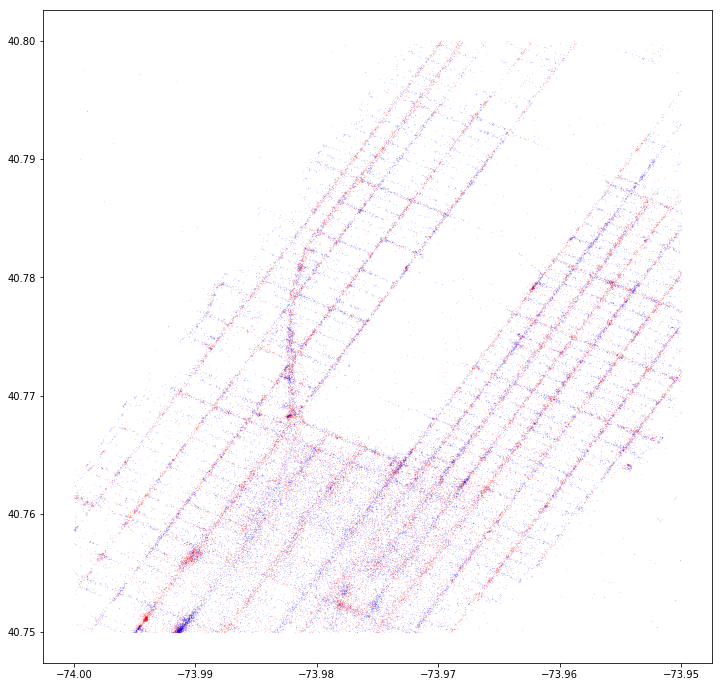

In [60]:
#plot_hires(train_df, (-74.0, -72.95, 40.7, 41.75)) # all
#plot_hires(train_df, (-73.1, -72.9, 41.6, 41.8)) # 7618
plot_hires(train_df, (-74.0, -73.95, 40.75, 40.8)) #Manhatan zoom

# Implementing NYC Taxi fare amount estimation

In [97]:
import numpy as np
from pandas import read_csv
#from pandas import read_csv, cut, IntervalIndex
#import matplotlib.pyplot as plt
#%matplotlib inline

In [101]:
%%time

types = {'fare_amount': 'float32',
         'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32',
         #'passenger_count': 'uint8'
        }

cols = ['fare_amount', 'pickup_datetime',
        'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude',
       #'passenger_count'
       ]

train_df = read_csv('train1.csv', parse_dates=['pickup_datetime'],
                    infer_datetime_format=True,
                   dtype = types, usecols=cols)

print(train_df.shape)

(2000000, 6)
CPU times: user 15 s, sys: 422 ms, total: 15.4 s
Wall time: 15.8 s


In [102]:
train_df = transform_train(train_df)
train_df.head()

Maximum fare_amount: 300.0
(1933911, 8)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekend,h_class,period
0,34.669998,-73.870819,40.773991,-73.999054,40.760658,0,3,0
1,4.000000,-74.004051,40.752945,-74.001144,40.746910,0,3,1
2,3.300000,-73.980865,40.750500,-73.981079,40.755962,1,1,0
3,7.300000,-73.979965,40.743340,-73.988792,40.759567,0,1,0
4,7.000000,-73.993851,40.720497,-74.007256,40.726669,0,2,1


In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933911 entries, 0 to 1999999
Data columns (total 8 columns):
fare_amount          float32
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float32
weekend              uint8
h_class              uint8
period               uint8
dtypes: float32(5), uint8(3)
memory usage: 57.2 MB


## Training the model

In [47]:
from sklearn.model_selection import train_test_split
from pandas import DataFrame

X = train_df.iloc[:,1:].values
y = train_df.iloc[:,0].values

seed = 101

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.00063, random_state=seed)

train_df_ = DataFrame({'fare_amount': y_train,
                       'pickup_longitude': X_train[:,0],
                        'pickup_latitude': X_train[:,1],
                        'dropoff_longitude': X_train[:,2],
                        'dropoff_latitude': X_train[:,3],
                        #'eightpmto6am': X_train[:,4].astype('uint8'),
                        #'rushhour': X_train[:,5].astype('uint8'),
                        'weekend': X_train[:,4].astype('uint8'),
                        'h_class': X_train[:,5].astype('uint8'),
                        #'month': X_train[:,6].astype('uint8'), 
                        'period': X_train[:,6].astype('uint8')
                       },
                       columns = ['fare_amount','pickup_longitude',
                                  'pickup_latitude','dropoff_longitude',
                                  'dropoff_latitude',
                                  #'eightpmto6am',
                                  #'rushhour',
                                  'weekend',
                                  'h_class',
                                  #'month',
                                  'period'
                                 ])

train_test = DataFrame({'pickup_longitude': X_test[:,0],
                        'pickup_latitude': X_test[:,1],
                        'dropoff_longitude': X_test[:,2],
                        'dropoff_latitude': X_test[:,3],
                        #'eightpmto6am': X_test[:,4].astype('uint8'),
                        #'rushhour': X_test[:,5].astype('uint8'),
                        'weekend': X_test[:,4].astype('uint8'),
                        'h_class': X_test[:,5].astype('uint8'),
                        #'month': X_test[:,6].astype('uint8'),
                        'period': X_test[:,6].astype('uint8')
                       },
                       columns = ['pickup_longitude', 'pickup_latitude',
                                 'dropoff_longitude', 'dropoff_latitude',
                                 #'eightpmto6am',
                                 #'rushhour',
                                 'weekend',
                                 'h_class',
                                 #'month',
                                 'period'
                                 ])

train_test.to_csv('train_test.csv', index = False)

In [48]:
train_test = read_csv('train_test.csv')
train_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekend,h_class,period
0,-74.016200,40.711166,-74.010140,40.721455,0,2,1
1,-73.985016,40.742230,-74.007850,40.705685,1,1,0
2,-73.956090,40.781906,-73.967834,40.792090,1,3,0
3,-73.964850,40.806923,-73.968094,40.762733,0,3,1
4,-73.987910,40.718338,-73.961390,40.709763,1,1,0


In [49]:
train_df_.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekend,h_class,period
0,56.799999,-73.776619,40.645271,-73.983971,40.748756,0,2,1
1,12.000000,-74.002533,40.739510,-74.016510,40.706032,0,3,1
2,10.000000,-73.992317,40.750362,-74.012482,40.715256,0,1,1
3,6.500000,-73.960114,40.762001,-73.971878,40.757973,0,2,1
4,4.100000,-73.998764,40.755024,-73.989601,40.762096,0,1,0


In [50]:
train_df_.shape[0]

15462702

In [51]:
train_test.shape[0]

9748

In [52]:
del(train_df)

In [104]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekend,h_class,period
0,34.669998,-73.870819,40.773991,-73.999054,40.760658,0,3,0
1,4.000000,-74.004051,40.752945,-74.001144,40.746910,0,3,1
2,3.300000,-73.980865,40.750500,-73.981079,40.755962,1,1,0
3,7.300000,-73.979965,40.743340,-73.988792,40.759567,0,1,0
4,7.000000,-73.993851,40.720497,-74.007256,40.726669,0,2,1


# Ball Tree

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [108]:
X = train_df.iloc[:,[1,2,3,4,7]].values
y = train_df.iloc[:,0].values
#del(train_df)

seed = 101

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.005, random_state=seed)
X_test.shape

(9670, 5)

In [109]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
# n_jobs doesn't affect fit method.
neigh = KNeighborsRegressor(n_neighbors=10, algorithm='ball_tree',
                            leaf_size=30, weights = 'distance',
                            n_jobs=-1)

In [ ]:
%%time
neigh.fit(X_train, y_train) 

In [98]:
%%time
y_pred = neigh.predict(X_test)

CPU times: user 1min 24s, sys: 162 ms, total: 1min 25s
Wall time: 11.2 s


In [99]:
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE: 3.53


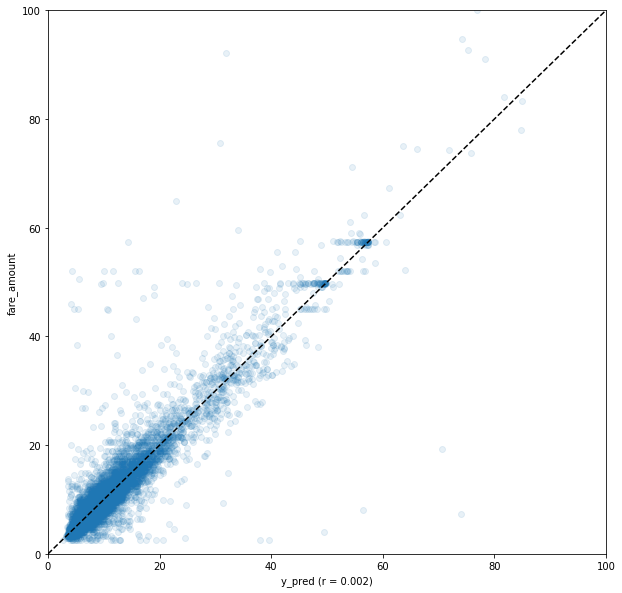

In [100]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
ax1.scatter(y_pred,y_test, alpha = 0.1)
ax1.plot((0,100),(0,100), c = 'black', linestyle = 'dashed')
ax1.set_xlabel('y_pred (r = 0.002)')
ax1.set_ylabel('fare_amount')
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)
plt.show()

# One Radius Model

In [36]:
%%time
import pyprind
pbar = pyprind.ProgBar(train_test.shape[0])
CHUNK_SIZE = 1

y_pred = list()
subset_size = list()

types = {'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32',
         'weekend': 'uint8',
         'h_class': 'uint8',
         'month': 'uint8',
         'period': 'uint8'
        }
a=0
b=0
with open('train_test.csv', 'rb') as R:
    iterator = read_csv(R, chunksize=CHUNK_SIZE, dtype = types)
    for n, data_chunk in enumerate(iterator):
        #define the radius1
        r2=0.002**2
        subset = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                           (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                          ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                           (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2)
                           & (train_df_.period == data_chunk.iloc[0,7])
                           #& (train_df_.weekend == data_chunk.iloc[0,4])
                           & (train_df_.h_class == data_chunk.iloc[0,5])
                           & (train_df_.month == data_chunk.iloc[0,6])
                          ]
        # BEFORE CALCULATE THE MEAN DROP OUTLIERS FROM THE SUBSET
        # BASED ON FARE_AMOUNT VALUES, Ex. FARE_AMOUNT > 2xSIGMA
        subset = subset[np.abs(subset.fare_amount -
                               subset.fare_amount.mean()) <= (2*subset.fare_amount.std())]
        if subset.shape[0] >= 3:
            subset_size.append(subset.shape[0])
            y_pred.append(subset.fare_amount.mean())
            a=a+1
        else:
            subset_size.append('nan')
            y_pred.append('nan')
            b=b+1
        #print(subset.fare_amount.mean())
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pbar.update()
        pass

0% [##############################] 100% | ETA: 00:00:00

CPU times: user 1h 12min 13s, sys: 10min 55s, total: 1h 23min 8s
Wall time: 20min 55s



Total time elapsed: 00:20:53


In [37]:
print('N(r1): %.i' % a)
print('NaN: %.i' % b)

N(r1): 2275
NaN: 7395


In [38]:
from pandas import DataFrame
#y_pred2 = ['%.4f' % elem for elem in y_pred]
training = DataFrame({'fare_amount': y_test,
                      'y_pred': y_pred,
                      'subset_size': subset_size},
                       columns = ['fare_amount',
                                  'y_pred',
                                 'subset_size'])
training.to_csv('training5M_r1_08.csv', index = False)
training = read_csv('training5M_r1_08.csv')
training.head()

,fare_amount,y_pred,subset_size
0,10.9,NaN,NaN
1,9.7,NaN,NaN
2,12.1,8.233334,3.0
3,4.9,5.384210,19.0
4,7.3,NaN,NaN


In [39]:
training.isnull().sum()

fare_amount       0
y_pred         7395
subset_size    7395
dtype: int64

In [40]:
from sklearn.metrics import mean_squared_error
R1pred = training.dropna(subset=['y_pred'])
print('Mean size of the subsets: %.2f' % 
      training.dropna(subset=['subset_size']).subset_size.mean())
print('Number of fare amounts predicted: %.i' % R1pred.shape[0])
print('RMSE: %.2f' % np.sqrt(mean_squared_error(R1pred.y_pred,R1pred.fare_amount)))

Mean size of the subsets: 6.01
Number of fare amounts predicted: 2275
RMSE: 2.47


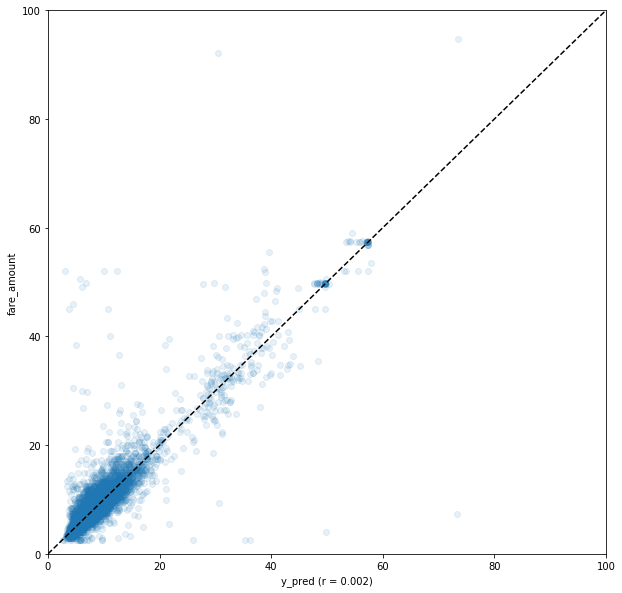

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
ax1.scatter(R1pred.y_pred,R1pred.fare_amount, alpha = 0.1)
ax1.plot((0,100),(0,100), c = 'black', linestyle = 'dashed')
ax1.set_xlabel('y_pred (r = 0.002)')
ax1.set_ylabel('fare_amount')
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)
plt.show()

# Two Radius Model

In [67]:
%%time
import pyprind
pbar = pyprind.ProgBar(train_test.shape[0])
CHUNK_SIZE = 1

y_pred = list()
y_predR1 = list()
y_predR2 = list()
subset_size = list()
subset2_size = list()

types = {'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32',
         'weekend': 'uint8',
         'h_class': 'uint8',
         'period': 'uint8'
        }
a=0
b=0
c=0
with open('train_test.csv', 'rb') as R:
    iterator = read_csv(R, chunksize=CHUNK_SIZE, dtype = types)
    for n, data_chunk in enumerate(iterator):
        #define the radius1
        r2=0.001**2
        subset = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                           (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                          ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                           (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2)
                           & (train_df_.period == data_chunk.iloc[0,6])
                           & (train_df_.weekend == data_chunk.iloc[0,4])
                           & (train_df_.h_class == data_chunk.iloc[0,5])
                          ]
        # BEFORE CALCULATE THE MEAN DROP OUTLIERS FROM THE SUBSET
        # BASED ON FARE_AMOUNT VALUES, Ex. FARE_AMOUNT > 2xSIGMA
        subset = subset[np.abs(subset.fare_amount -
                               subset.fare_amount.mean()) <= (2*subset.fare_amount.std())]
        if subset.shape[0] > 3:
            y_predR1.append(subset.fare_amount.mean())
            y_predR2.append('nan')
            subset2_size.append('nan')
            subset_size.append(subset.shape[0])
            y_pred.append(subset.fare_amount.mean())
            a=a+1
        else:
            y_predR1.append('nan')
            subset_size.append('nan')
            #define the radius2
            r2=0.002**2
            subset2 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                           (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                          ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                           (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2)
                           & (train_df_.weekend == data_chunk.iloc[0,4])
                           & (train_df_.h_class == data_chunk.iloc[0,5])
                           & (train_df_.period == data_chunk.iloc[0,6])
                               ]

            subset2 = subset2[np.abs(subset2.fare_amount -
                               subset2.fare_amount.mean()) <= (2*subset2.fare_amount.std())]
            if subset2.shape[0] > 0:
                y_predR2.append(subset2.fare_amount.mean())
                y_pred.append(subset2.fare_amount.mean())
                subset2_size.append(subset2.shape[0])
                b=b+1
            else:
                y_predR2.append('nan')
                subset2_size.append('nan')
                y_pred.append('nan')
                c=c+1
            
        #print(subset.fare_amount.mean())
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pbar.update()
        pass

0% [##############################] 100% | ETA: 00:00:00

CPU times: user 2min 13s, sys: 8.65 s, total: 2min 22s
Wall time: 2min 23s



Total time elapsed: 00:02:23


In [68]:
print('N(r1): %.i' % a)
print('N(r2): %.i' % b)
print('N(r3): %.i' % c)

N(r1): 3
N(r2): 491
N(r3): 9182


In [69]:
print(len(y_test))
#print(len(y_pred))
print(len(y_predR1))
print(len(y_predR2))
print(len(subset_size))
print(len(subset2_size))

9676
9676
9676
9676
9676


In [70]:
from pandas import DataFrame

training = DataFrame({'fare_amount': y_test,
                      'y_pred': y_pred,
                      'y_predR1': y_predR1,
                      'subset_size': subset_size,
                      'y_predR2': y_predR2,
                      'subset2_size': subset2_size,
                     },
                       columns = ['fare_amount',
                                  'y_pred'
                                  'y_predR1',
                                  'subset_size',
                                  'y_predR2',
                                  'subset2_size',
                                  'y_pred'
                                 ])

training.to_csv('training.csv', index = False)
training = read_csv('training.csv')
training.head()

,fare_amount,y_predy_predR1,subset_size,y_predR2,subset2_size,y_pred
0,22.0,NaN,NaN,NaN,NaN,NaN
1,10.1,NaN,NaN,NaN,NaN,NaN
2,17.5,NaN,NaN,NaN,NaN,NaN
3,9.3,NaN,NaN,NaN,NaN,NaN
4,9.3,NaN,NaN,NaN,NaN,NaN


# Four radius model

In [16]:
%%time
import pyprind
pbar = pyprind.ProgBar(train_test.shape[0])
CHUNK_SIZE = 1

#y_pred = list()
y_predR1 = list()
y_predR2 = list()
y_predR3 = list()
y_predR4 = list()
subset_size = list()
subset2_size = list()
subset3_size = list()
subset4_size = list()

types = {'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32',
         'weekend': 'uint8',
         'h_class': 'uint8',
         'period': 'uint8'
        }
a=0
b=0
c=0
d=0
e=0
with open('train_test.csv', 'rb') as R:
    iterator = read_csv(R, chunksize=CHUNK_SIZE, dtype = types)
    for n, data_chunk in enumerate(iterator):
        #define radius1
        r2=0.001**2
        subset = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                           (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                          ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                           (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2) &
                           #(train_df_.weekend == data_chunk.iloc[0,4]) &
                           (train_df_.h_class == data_chunk.iloc[0,5]) &
                           (train_df_.period == data_chunk.iloc[0,6])]

        # BEFORE CALCULATE THE MEAN DROP OUTLIERS FROM THE SUBSET
        # BASED ON FARE_AMOUNT VALUES, EG. FARE_AMOUNT > 3SIGMA
        subset = subset[np.abs(subset.fare_amount -
                               subset.fare_amount.mean()) <= (2*subset.fare_amount.std())]
        if subset.shape[0] >= 3:
            y_predR1.append(subset.fare_amount.mean())
            subset_size.append(subset.shape[0])
            y_predR2.append('nan')
            y_predR3.append('nan')
            y_predR4.append('nan')
            subset2_size.append('nan')
            subset3_size.append('nan')
            subset4_size.append('nan')
            #y_pred.append(subset.fare_amount.mean())
            a=a+1
        else:
            y_predR1.append('nan')
            subset_size.append('nan')
            #define radius2
            r2=0.002**2
            subset2 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                           (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                          ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                           (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2) &
                           #(train_df_.weekend == data_chunk.iloc[0,4]) &
                           #(train_df_.h_class == data_chunk.iloc[0,5]) &
                           (train_df_.period == data_chunk.iloc[0,6])]

            subset2 = subset2[np.abs(subset2.fare_amount -
                               subset2.fare_amount.mean()) <= (1.5*subset2.fare_amount.std())]
            if subset2.shape[0] >= 3:
                y_predR2.append(subset2.fare_amount.mean())
                subset2_size.append(subset2.shape[0])
                y_predR3.append('nan')
                y_predR4.append('nan')
                subset3_size.append('nan')
                subset4_size.append('nan')
                #y_pred.append(subset2.fare_amount.mean())
                b=b+1
            else:
                y_predR2.append('nan')
                subset2_size.append('nan')
                #define radius3
                r2=0.005**2
                subset3 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                                    (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                                   ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                                    (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2) &
                                    #(train_df_.weekend == data_chunk.iloc[0,4]) &
                                    #(train_df_.h_class == data_chunk.iloc[0,5]) &
                                    (train_df_.period == data_chunk.iloc[0,6])
                                   ]
                
                subset3 = subset3[np.abs(subset3.fare_amount -
                               subset3.fare_amount.mean()) <= (1.5*subset3.fare_amount.std())]
                if subset3.shape[0] >= 3:
                    y_predR3.append(subset3.fare_amount.mean())
                    subset3_size.append(subset3.shape[0])
                    y_predR4.append('nan')
                    subset4_size.append('nan')
                    #y_pred.append(subset3.fare_amount.mean())
                    c=c+1
                else:
                    y_predR3.append('nan')
                    subset3_size.append('nan')
                    #define radius4
                    r2=0.02**2
                    subset4 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                                    (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                                  ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                                    (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2)
                                        #& (train_df_.period == data_chunk.iloc[0,6])
                                       ]
                    subset4 = subset4[np.abs(subset4.fare_amount -
                               subset4.fare_amount.mean()) <= (1*subset4.fare_amount.std())]
                    if subset4.shape[0] >= 3:
                        y_predR4.append(subset4.fare_amount.mean())
                        subset4_size.append(subset4.shape[0])
                        #y_pred.append(subset4.fare_amount.mean())
                        d=d+1
                    else:
                        y_predR4.append(30)
                        subset4_size.append('nan')
                        #y_pred.append('nan')
                        e=e+1
        #print(subset.fare_amount.mean())
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pbar.update()
        pass

0% [##############################] 100% | ETA: 00:00:00

CPU times: user 2h 44min 31s, sys: 28min, total: 3h 12min 32s
Wall time: 48min 39s



Total time elapsed: 00:48:39


In [17]:
# Check the number of predictions in each radius
print('N(r1): %.i' % a)
print('N(r2): %.i' % b)
print('N(r3): %.i' % c)
print('N(r4): %.i' % d)
print('NaN: %.i' % e)

N(r1): 4000
N(r2): 4931
N(r3): 611
N(r4): 125
NaN: 4


In [18]:
# Check consistency of the list sizes 
print(len(y_predR1))
print(len(y_predR2))
print(len(y_predR3))
print(len(y_predR4))
print(len(subset_size))
print(len(subset2_size))
print(len(subset3_size))
print(len(subset4_size))

9671
9671
9671
9671
9671
9671
9671
9671


In [19]:
from pandas import DataFrame
#y_pred2 = ['%.4f' % elem for elem in y_pred]
training = DataFrame({'fare_amount': y_test,
                      #'y_pred': y_pred,
                      'y_predR1': y_predR1,
                      'subset_size': subset_size,
                      'y_predR2': y_predR2,
                      'subset2_size': subset2_size,
                      'y_predR3': y_predR3,
                      'subset3_size': subset3_size,
                      'y_predR4': y_predR4,
                      'subset4_size': subset4_size
                     },
                       columns = ['fare_amount',
                       #           'y_pred',
                                  'y_predR1',
                                  'subset_size',
                                  'y_predR2',
                                  'subset2_size',
                                  'y_predR3',
                                  'subset3_size',
                                  'y_predR4',
                                  'subset4_size'
                                 ])

training.to_csv('training8M_r4_06.csv', index = False)

In [20]:
training = read_csv('training8M_r4_06.csv')
training.head()

,fare_amount,y_predR1,subset_size,y_predR2,subset2_size,y_predR3,subset3_size,y_predR4,subset4_size
0,20.1,NaN,NaN,16.90,3.0,NaN,NaN,NaN,NaN
1,5.0,5.972222,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4.5,3.600000,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,7.000000,14.0,NaN,NaN,NaN,NaN,NaN,NaN
4,18.9,NaN,NaN,16.45,8.0,NaN,NaN,NaN,NaN


In [21]:
training['y_pred'] = np.where(training['y_predR1'].isnull()==True,
                              training['y_predR2'],
                              training['y_predR1'])
training['y_pred'] = np.where(training['y_pred'].isnull()==True,
                              training['y_predR3'],
                              training['y_pred'])
training['y_pred'] = np.where(training['y_pred'].isnull()==True,
                              training['y_predR4'],
                              training['y_pred'])

In [22]:
training.isnull().sum()

fare_amount        0
y_predR1        5671
subset_size     5671
y_predR2        4740
subset2_size    4740
y_predR3        9060
subset3_size    9060
y_predR4        9542
subset4_size    9546
y_pred             0
dtype: int64

In [23]:
from sklearn.metrics import mean_squared_error

R1pred = training.dropna(subset=['y_predR1'])
print('Mean size of the subsets R1: %.2f' % 
      training.dropna(subset=['subset_size']).subset_size.mean())
print('Number of fare amounts predicted R1: %.i' % R1pred.shape[0])
print('RMSE R1: %.2f' % np.sqrt(mean_squared_error(R1pred.y_pred,
                                                   R1pred.fare_amount)))

R2pred = training.dropna(subset=['y_predR2'])
print('Mean size of the subsets R2: %.2f' % 
      training.dropna(subset=['subset2_size']).subset2_size.mean())
print('Number of fare amounts predicted R2: %.i' % R2pred.shape[0])
print('RMSE R2: %.2f' % np.sqrt(mean_squared_error(R2pred.y_pred,
                                                   R2pred.fare_amount)))

R3pred = training.dropna(subset=['y_predR3'])
print('Mean size of the subsets R3: %.2f' % 
      training.dropna(subset=['subset3_size']).subset3_size.mean())
print('Number of fare amounts predicted R3: %.i' % R3pred.shape[0])
print('RMSE R3: %.2f' % np.sqrt(mean_squared_error(R3pred.y_pred,
                                                   R3pred.fare_amount)))

R4pred = training.dropna(subset=['y_predR4'])
print('Mean size of the subsets R4: %.2f' % 
      training.dropna(subset=['subset4_size']).subset4_size.mean())
print('Number of fare amounts predicted R4: %.i' % R4pred.shape[0])
print('RMSE R4: %.2f' % np.sqrt(mean_squared_error(R4pred.y_pred,
                                                   R4pred.fare_amount)))

pred = training.dropna(subset=['y_pred'])
print(pred.shape)
print('RMSE: %.5f' % np.sqrt(mean_squared_error(pred.y_pred,pred.fare_amount)))

Mean size of the subsets R1: 10.28
Number of fare amounts predicted R1: 4000
RMSE R1: 2.62
Mean size of the subsets R2: 63.11
Number of fare amounts predicted R2: 4931
RMSE R2: 2.54
Mean size of the subsets R3: 51.42
Number of fare amounts predicted R3: 611
RMSE R3: 5.48
Mean size of the subsets R4: 2633.01
Number of fare amounts predicted R4: 129
RMSE R4: 10.58
(9671, 10)
RMSE: 3.08137


In [24]:
training.describe()

,fare_amount,y_predR1,subset_size,y_predR2,subset2_size,y_predR3,subset3_size,y_predR4,subset4_size,y_pred
count,9671.000000,4000.000000,4000.000000,4931.000000,4931.000000,611.000000,611.000000,129.000000,125.00000,9671.000000
mean,11.276311,8.685027,10.276750,11.288485,63.110322,20.294047,51.418985,29.206795,2633.00800,11.019643
std,9.505393,7.079423,13.786884,8.351651,68.819743,12.225926,87.074443,17.977773,10026.42376,9.062700
min,2.500000,2.633333,3.000000,2.833333,3.000000,4.300000,3.000000,5.109617,3.00000,2.633333
25%,6.000000,5.391453,4.000000,6.680714,16.000000,12.138839,10.000000,15.538427,78.00000,6.033333
50%,8.500000,6.833334,6.000000,9.172728,42.000000,18.180264,26.000000,26.392174,257.00000,8.220000
75%,12.500000,9.000000,11.000000,12.734135,86.000000,25.602563,66.000000,38.611626,722.00000,12.003333
max,140.300000,76.650000,200.000000,96.930000,714.000000,86.414990,1004.000000,93.483340,61543.00000,96.930000


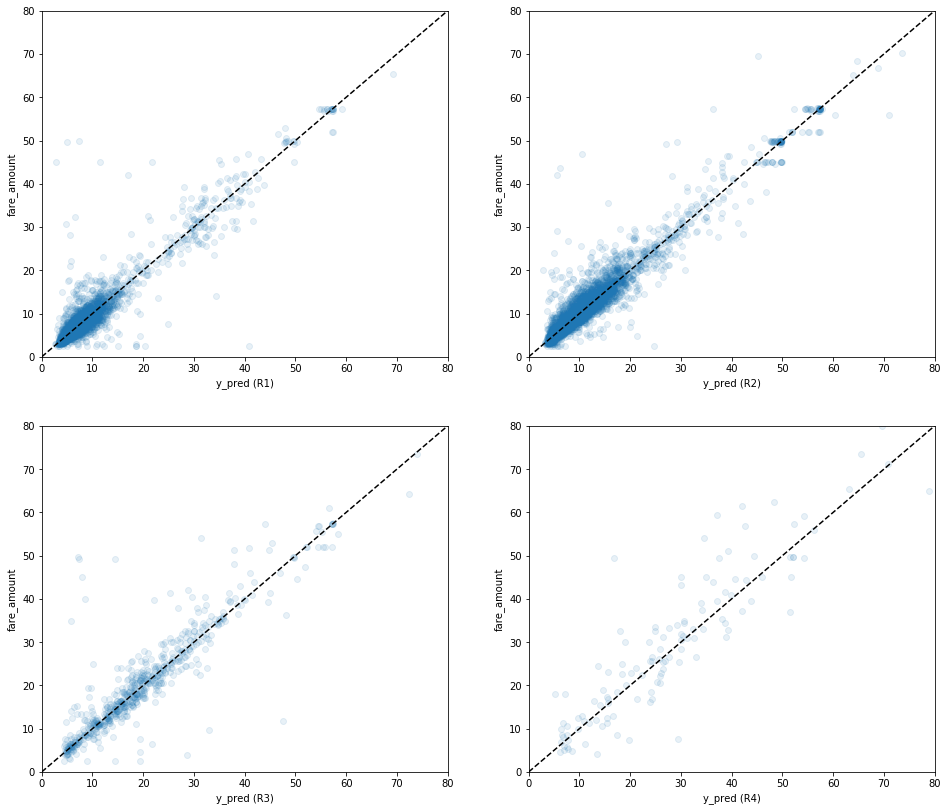

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,14))
ax1 = plt.subplot(221)
ax1.scatter(training.y_predR1,training.fare_amount, alpha=0.1)
ax1.plot((0,80),(0,80), c = 'black', linestyle = 'dashed')
ax1.set_xlabel('y_pred (R1)')
ax1.set_ylabel('fare_amount')
ax1.set_xlim(0,80)
ax1.set_ylim(0,80)

ax2 = plt.subplot(222)
ax2.scatter(training.y_predR2,training.fare_amount, alpha=0.1)
ax2.plot((0,80),(0,80), c = 'black', linestyle = 'dashed')
ax2.set_xlabel('y_pred (R2)')
ax2.set_ylabel('fare_amount')
ax2.set_xlim(0,80)
ax2.set_ylim(0,80)

ax3 = plt.subplot(223)
ax3.scatter(training.y_predR3,training.fare_amount, alpha=0.1)
ax3.plot((0,80),(0,80), c = 'black', linestyle = 'dashed')
ax3.set_xlabel('y_pred (R3)')
ax3.set_ylabel('fare_amount')
ax3.set_xlim(0,80)
ax3.set_ylim(0,80)

ax4 = plt.subplot(224)
ax4.scatter(training.y_predR4,training.fare_amount, alpha=0.1)
ax4.plot((0,80),(0,80), c = 'black', linestyle = 'dashed')
ax4.set_xlabel('y_pred (R4)')
ax4.set_ylabel('fare_amount')
ax4.set_xlim(0,80)
ax4.set_ylim(0,80)
plt.show()

In [36]:
train_test.shape[0]

9676

# Five radius model

In [53]:
%%time
import pyprind
pbar = pyprind.ProgBar(train_test.shape[0])
CHUNK_SIZE = 1

#y_pred = list()
y_predR1 = list()
y_predR2 = list()
y_predR3 = list()
y_predR4 = list()
y_predR5 = list()
subset_size = list()
subset2_size = list()
subset3_size = list()
subset4_size = list()
subset5_size = list()

types = {'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32',
         'weekend': 'uint8',
         'h_class': 'uint8',
         'period': 'uint8'
        }
a=0
b=0
c=0
d=0
e=0
f=0
with open('train_test.csv', 'rb') as R:
    iterator = read_csv(R, chunksize=CHUNK_SIZE, dtype = types)
    for n, data_chunk in enumerate(iterator):
        #define radius1
        r2=0.0008**2
        subset = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                           (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                          ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                           (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2) &
                           #(train_df_.weekend == data_chunk.iloc[0,4]) &
                           (train_df_.h_class == data_chunk.iloc[0,5]) &
                           (train_df_.period == data_chunk.iloc[0,6])]

        # BEFORE CALCULATE THE MEAN DROP OUTLIERS FROM THE SUBSET
        # BASED ON FARE_AMOUNT VALUES, EG. FARE_AMOUNT > 3SIGMA
        subset = subset[np.abs(subset.fare_amount -
                               subset.fare_amount.mean()) <= (2*subset.fare_amount.std())]
        if subset.shape[0] >= 3:
            y_predR1.append(subset.fare_amount.mean())
            subset_size.append(subset.shape[0])
            y_predR2.append('nan')
            y_predR3.append('nan')
            y_predR4.append('nan')
            y_predR5.append('nan')
            subset2_size.append('nan')
            subset3_size.append('nan')
            subset4_size.append('nan')
            subset5_size.append('nan')
            #y_pred.append(subset.fare_amount.mean())
            a=a+1
        else:
            y_predR1.append('nan')
            subset_size.append('nan')
            #define radius2
            r2=0.0012**2
            subset2 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                           (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                          ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                           (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2) &
                           #(train_df_.weekend == data_chunk.iloc[0,4]) &
                           (train_df_.h_class == data_chunk.iloc[0,5]) &
                           (train_df_.period == data_chunk.iloc[0,6])]

            subset2 = subset2[np.abs(subset2.fare_amount -
                               subset2.fare_amount.mean()) <= (2*subset2.fare_amount.std())]
            if subset2.shape[0] >= 3:
                y_predR2.append(subset2.fare_amount.mean())
                subset2_size.append(subset2.shape[0])
                y_predR3.append('nan')
                y_predR4.append('nan')
                y_predR5.append('nan')
                subset3_size.append('nan')
                subset4_size.append('nan')
                subset5_size.append('nan')
                #y_pred.append(subset2.fare_amount.mean())
                b=b+1
            else:
                y_predR2.append('nan')
                subset2_size.append('nan')
                #define radius3
                r2=0.002**2
                subset3 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                                    (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                                   ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                                    (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2)
                                    #& (train_df_.weekend == data_chunk.iloc[0,4])
                                    & (train_df_.h_class == data_chunk.iloc[0,5])
                                    & (train_df_.period == data_chunk.iloc[0,6])
                                   ]
                
                subset3 = subset3[np.abs(subset3.fare_amount -
                               subset3.fare_amount.mean()) <= (2*subset3.fare_amount.std())]
                if subset3.shape[0] >= 3:
                    y_predR3.append(subset3.fare_amount.mean())
                    subset3_size.append(subset3.shape[0])
                    y_predR4.append('nan')
                    y_predR5.append('nan')
                    subset4_size.append('nan')
                    subset5_size.append('nan')
                    #y_pred.append(subset3.fare_amount.mean())
                    c=c+1
                else:
                    y_predR3.append('nan')
                    subset3_size.append('nan')
                    #define radius4
                    r2=0.003**2
                    subset4 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                                    (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                                  ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                                    (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2)
                                        #& (train_df_.weekend == data_chunk.iloc[0,4])
                                        & (train_df_.h_class == data_chunk.iloc[0,5])
                                        & (train_df_.period == data_chunk.iloc[0,6])
                                       ]
                    subset4 = subset4[np.abs(subset4.fare_amount -
                               subset4.fare_amount.mean()) <= (2*subset4.fare_amount.std())]
                    if subset4.shape[0] >= 3:
                        y_predR4.append(subset4.fare_amount.mean())
                        subset4_size.append(subset4.shape[0])
                        y_predR5.append('nan')
                        subset5_size.append('nan')
                        #y_pred.append(subset4.fare_amount.mean())
                        d=d+1
                    else:
                        y_predR4.append('nan')
                        subset4_size.append('nan')
                        r2=0.02**2
                        subset5 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,0])**2 + 
                                    (train_df_.pickup_latitude - data_chunk.iloc[0,1])**2 < r2) &
                                  ((train_df_.dropoff_longitude - data_chunk.iloc[0,2])**2 + 
                                    (train_df_.dropoff_latitude - data_chunk.iloc[0,3])**2 < r2)
                                        #& (train_df_.period == data_chunk.iloc[0,6])
                                       ]
                        subset5 = subset5[np.abs(subset5.fare_amount -
                               subset5.fare_amount.mean()) <= (1*subset5.fare_amount.std())]
                        if subset5.shape[0] >= 3:
                            y_predR5.append(subset5.fare_amount.mean())
                            subset5_size.append(subset5.shape[0])
                            e=e+1
                        else:
                            y_predR5.append(35)
                            subset5_size.append('nan')
                            #y_pred.append('nan')
                            f=f+1
        #print(subset.fare_amount.mean())
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pbar.update()
        pass

0% [##############################] 100% | ETA: 00:00:00

CPU times: user 5h 50min 3s, sys: 55min 40s, total: 6h 45min 44s
Wall time: 1h 41min 37s



Total time elapsed: 01:41:37


In [54]:
# Check the number of predictions in each radius
print('N(r1): %.i' % a)
print('N(r2): %.i' % b)
print('N(r3): %.i' % c)
print('N(r4): %.i' % d)
print('N(r5): %.i' % e)
print('NaN: %.i' % f)

N(r1): 5040
N(r2): 2362
N(r3): 1489
N(r4): 431
N(r5): 422
NaN: 4


In [55]:
# Check consistency of the list sizes 
print(len(y_predR1))
print(len(y_predR2))
print(len(y_predR3))
print(len(y_predR4))
print(len(y_predR5))
print(len(subset_size))
print(len(subset2_size))
print(len(subset3_size))
print(len(subset4_size))
print(len(subset5_size))

9748
9748
9748
9748
9748
9748
9748
9748
9748
9748


In [56]:
from pandas import DataFrame
#y_pred2 = ['%.4f' % elem for elem in y_pred]
training = DataFrame({'fare_amount': y_test,
                      #'y_pred': y_pred,
                      'y_predR1': y_predR1,
                      'subset_size': subset_size,
                      'y_predR2': y_predR2,
                      'subset2_size': subset2_size,
                      'y_predR3': y_predR3,
                      'subset3_size': subset3_size,
                      'y_predR4': y_predR4,
                      'subset4_size': subset4_size,
                      'y_predR5': y_predR5,
                      'subset5_size': subset5_size
                     },
                       columns = ['fare_amount',
                       #           'y_pred',
                                  'y_predR1',
                                  'subset_size',
                                  'y_predR2',
                                  'subset2_size',
                                  'y_predR3',
                                  'subset3_size',
                                  'y_predR4',
                                  'subset4_size',
                                  'y_predR5',
                                  'subset5_size'
                                 ])

training.to_csv('training16M_r5_04.csv', index = False)

In [57]:
training = read_csv('training16M_r5_04.csv')
training.head()

,fare_amount,y_predR1,subset_size,y_predR2,subset2_size,y_predR3,subset3_size,y_predR4,subset4_size,y_predR5,subset5_size
0,6.5,5.907895,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.3,11.071428,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.5,NaN,NaN,7.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,18.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.3,5.881818,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
training['y_pred'] = np.where(training['y_predR1'].isnull()==True,
                              training['y_predR2'],
                              training['y_predR1'])
training['y_pred'] = np.where(training['y_pred'].isnull()==True,
                              training['y_predR3'],
                              training['y_pred'])
training['y_pred'] = np.where(training['y_pred'].isnull()==True,
                              training['y_predR4'],
                              training['y_pred'])
training['y_pred'] = np.where(training['y_pred'].isnull()==True,
                              training['y_predR5'],
                              training['y_pred'])

In [59]:
training.head()

,fare_amount,y_predR1,subset_size,y_predR2,subset2_size,y_predR3,subset3_size,y_predR4,subset4_size,y_predR5,subset5_size,y_pred
0,6.5,5.907895,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.907895
1,11.3,11.071428,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.071428
2,6.5,NaN,NaN,7.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,7.100000
3,21.0,NaN,NaN,18.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,18.000000
4,5.3,5.881818,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.881818


In [60]:
training.isnull().sum()

fare_amount        0
y_predR1        4708
subset_size     4708
y_predR2        7386
subset2_size    7386
y_predR3        8259
subset3_size    8259
y_predR4        9317
subset4_size    9317
y_predR5        9322
subset5_size    9326
y_pred             0
dtype: int64

In [61]:
from sklearn.metrics import mean_squared_error

R1pred = training.dropna(subset=['y_predR1'])
print('Mean size of the subsets R1: %.2f' % 
      training.dropna(subset=['subset_size']).subset_size.mean())
print('Number of fare amounts predicted R1: %.i' % R1pred.shape[0])
print('RMSE R1: %.2f' % np.sqrt(mean_squared_error(R1pred.y_pred,
                                                   R1pred.fare_amount)))

R2pred = training.dropna(subset=['y_predR2'])
print('Mean size of the subsets R2: %.2f' % 
      training.dropna(subset=['subset2_size']).subset2_size.mean())
print('Number of fare amounts predicted R2: %.i' % R2pred.shape[0])
print('RMSE R2: %.2f' % np.sqrt(mean_squared_error(R2pred.y_pred,
                                                   R2pred.fare_amount)))

R3pred = training.dropna(subset=['y_predR3'])
print('Mean size of the subsets R3: %.2f' % 
      training.dropna(subset=['subset3_size']).subset3_size.mean())
print('Number of fare amounts predicted R3: %.i' % R3pred.shape[0])
print('RMSE R3: %.2f' % np.sqrt(mean_squared_error(R3pred.y_pred,
                                                   R3pred.fare_amount)))

R4pred = training.dropna(subset=['y_predR4'])
print('Mean size of the subsets R4: %.2f' % 
      training.dropna(subset=['subset4_size']).subset4_size.mean())
print('Number of fare amounts predicted R4: %.i' % R4pred.shape[0])
print('RMSE R4: %.2f' % np.sqrt(mean_squared_error(R4pred.y_pred,
                                                   R4pred.fare_amount)))

R5pred = training.dropna(subset=['y_predR5'])
print('Mean size of the subsets R5: %.2f' % 
      training.dropna(subset=['subset5_size']).subset5_size.mean())
print('Number of fare amounts predicted R5: %.i' % R5pred.shape[0])
print('RMSE R5: %.2f' % np.sqrt(mean_squared_error(R5pred.y_pred,
                                                   R5pred.fare_amount)))

pred = training.dropna(subset=['y_pred'])
print(pred.shape)
print('RMSE: %.5f' % np.sqrt(mean_squared_error(pred.y_pred,pred.fare_amount)))

Mean size of the subsets R1: 14.35
Number of fare amounts predicted R1: 5040
RMSE R1: 2.51
Mean size of the subsets R2: 7.40
Number of fare amounts predicted R2: 2362
RMSE R2: 3.33
Mean size of the subsets R3: 13.83
Number of fare amounts predicted R3: 1489
RMSE R3: 4.42
Mean size of the subsets R4: 10.22
Number of fare amounts predicted R4: 431
RMSE R4: 3.28
Mean size of the subsets R5: 27359.09
Number of fare amounts predicted R5: 426
RMSE R5: 12.00
(9748, 12)
RMSE: 3.96328


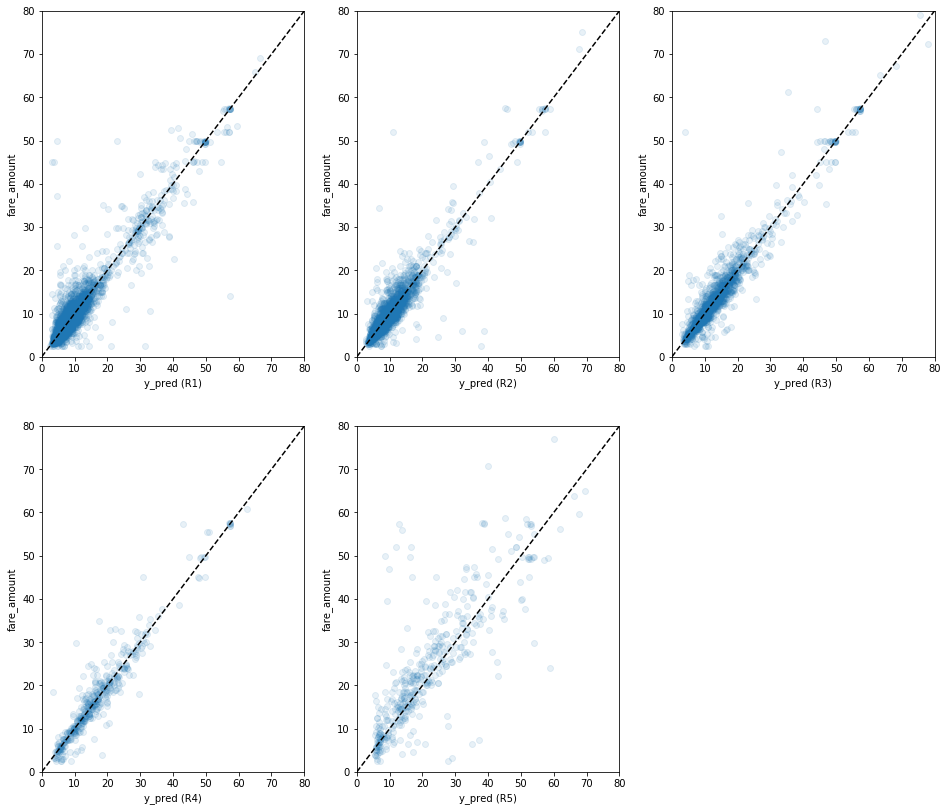

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,14))
ax1 = plt.subplot(231)
ax1.scatter(training.y_predR1,training.fare_amount, alpha=0.1)
ax1.plot((0,80),(0,80), c = 'black', linestyle = 'dashed')
ax1.set_xlabel('y_pred (R1)')
ax1.set_ylabel('fare_amount')
ax1.set_xlim(0,80)
ax1.set_ylim(0,80)

ax2 = plt.subplot(232)
ax2.scatter(training.y_predR2,training.fare_amount, alpha=0.1)
ax2.plot((0,80),(0,80), c = 'black', linestyle = 'dashed')
ax2.set_xlabel('y_pred (R2)')
ax2.set_ylabel('fare_amount')
ax2.set_xlim(0,80)
ax2.set_ylim(0,80)

ax3 = plt.subplot(233)
ax3.scatter(training.y_predR3,training.fare_amount, alpha=0.1)
ax3.plot((0,80),(0,80), c = 'black', linestyle = 'dashed')
ax3.set_xlabel('y_pred (R3)')
ax3.set_ylabel('fare_amount')
ax3.set_xlim(0,80)
ax3.set_ylim(0,80)

ax4 = plt.subplot(234)
ax4.scatter(training.y_predR4,training.fare_amount, alpha=0.1)
ax4.plot((0,80),(0,80), c = 'black', linestyle = 'dashed')
ax4.set_xlabel('y_pred (R4)')
ax4.set_ylabel('fare_amount')
ax4.set_xlim(0,80)
ax4.set_ylim(0,80)

ax5 = plt.subplot(235)
ax5.scatter(training.y_predR5,training.fare_amount, alpha=0.1)
ax5.plot((0,80),(0,80), c = 'black', linestyle = 'dashed')
ax5.set_xlabel('y_pred (R5)')
ax5.set_ylabel('fare_amount')
ax5.set_xlim(0,80)
ax5.set_ylim(0,80)


plt.show()

## Predictions

In [62]:
test_df = read_csv('test.csv', parse_dates=['pickup_datetime'], infer_datetime_format=True)

In [63]:
test_df = transform_test(test_df)
test_df.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekend,h_class,period
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,0,3,1
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,0,3,1
2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1,2,0
3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1,5,1
4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1,5,1


In [64]:
test_df.to_csv('test_df.csv', index = False)

In [65]:
types = {'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32',
         #'eightpmto6am': 'uint8',
         #'rushhour': 'uint8',
         'weekend': 'uint8',
         'h_class': 'uint8',
         'period': 'uint8'}

test_df = read_csv('test_df.csv', dtype=types)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 8 columns):
key                  9914 non-null object
pickup_longitude     9914 non-null float32
pickup_latitude      9914 non-null float32
dropoff_longitude    9914 non-null float32
dropoff_latitude     9914 non-null float32
weekend              9914 non-null uint8
h_class              9914 non-null uint8
period               9914 non-null uint8
dtypes: float32(4), object(1), uint8(3)
memory usage: 261.5+ KB


In [66]:
test_df.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekend,h_class,period
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,0,3,1
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,0,3,1
2,2011-10-08 11:53:44.0000002,-73.982521,40.751259,-73.979652,40.746140,1,2,0
3,2012-12-01 21:12:12.0000002,-73.981163,40.767807,-73.990448,40.751637,1,5,1
4,2012-12-01 21:12:12.0000003,-73.966049,40.789776,-73.988564,40.744427,1,5,1


In [47]:
test_df.shape

(9914, 8)

## Algorithm 2 radius

In [ ]:
%%time
import pyprind
pbar = pyprind.ProgBar(9914)
CHUNK_SIZE = 1

y_pred = list()

types = {'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32'}
a=0
b=0
with open('test_df.csv', 'rb') as R:
    iterator = read_csv(R, chunksize=CHUNK_SIZE, dtype = types)
    for n, data_chunk in enumerate(iterator):
        #define the radius1
        r2=0.002**2
        subset = train_df[((train_df.pickup_longitude - data_chunk.iloc[0,1])**2 + 
                           (train_df.pickup_latitude - data_chunk.iloc[0,2])**2 < r2) &
                          ((train_df.dropoff_longitude - data_chunk.iloc[0,3])**2 + 
                           (train_df.dropoff_latitude - data_chunk.iloc[0,4])**2 < r2) &
                          (train_df.period == data_chunk.iloc[0,7]) &
                           (train_df.h_class == data_chunk.iloc[0,6]) &
                           (train_df.weekend == data_chunk.iloc[0,5])]
        if subset.shape[0] >= 3:
            #define the radius2
            r2=0.005**2
            subset2 = train_df[((train_df.pickup_longitude - data_chunk.iloc[0,1])**2 + 
                           (train_df.pickup_latitude - data_chunk.iloc[0,2])**2 < r2) &
                          ((train_df.dropoff_longitude - data_chunk.iloc[0,3])**2 + 
                           (train_df.dropoff_latitude - data_chunk.iloc[0,4])**2 < r2) &
                          (train_df.period == data_chunk.iloc[0,7])]
            y_pred.append(subset2.fare_amount.mean())
            b=b+1
        else:
            y_pred.append(subset.fare_amount.mean())
            a=a+1
        #print(subset.fare_amount.mean())
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pbar.update()
        pass

In [67]:
test_df.shape

(9914, 8)

## Algorithm 4 radius

In [ ]:
%%time
import pyprind
pbar = pyprind.ProgBar(test_df.shape[0])
CHUNK_SIZE = 1

y_pred = list()
#y_predR1 = list()
#y_predR2 = list()
#y_predR3 = list()
#y_predR4 = list()
#subset_size = list()
#subset2_size = list()
#subset3_size = list()
#subset4_size = list()

types = {'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32',
         'weekend': 'uint8',
         'h_class': 'uint8',
         'period': 'uint8'
        }
a=0
b=0
c=0
d=0
e=0
with open('test_df.csv', 'rb') as R:
    iterator = read_csv(R, chunksize=CHUNK_SIZE, dtype = types)
    for n, data_chunk in enumerate(iterator):
        #define radius1
        r2=0.001**2
        subset = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,1])**2 + 
                           (train_df_.pickup_latitude - data_chunk.iloc[0,2])**2 < r2) &
                          ((train_df_.dropoff_longitude - data_chunk.iloc[0,3])**2 + 
                           (train_df_.dropoff_latitude - data_chunk.iloc[0,4])**2 < r2) &
                           (train_df_.weekend == data_chunk.iloc[0,5]) &
                           (train_df_.h_class == data_chunk.iloc[0,6]) &
                           (train_df_.period == data_chunk.iloc[0,7])]

        # BEFORE CALCULATE THE MEAN DROP OUTLIERS FROM THE SUBSET
        # BASED ON FARE_AMOUNT VALUES, EG. FARE_AMOUNT > 3SIGMA
        subset = subset[np.abs(subset.fare_amount -
                               subset.fare_amount.mean()) <= (2*subset.fare_amount.std())]
        if subset.shape[0] >= 3:
            #y_predR1.append(subset.fare_amount.mean())
            #subset_size.append(subset.shape[0])
            #y_predR2.append('nan')
            #y_predR3.append('nan')
            #y_predR4.append('nan')
            #subset2_size.append('nan')
            #subset3_size.append('nan')
            #subset4_size.append('nan')
            y_pred.append(subset.fare_amount.mean())
            a=a+1
        else:
            y_predR1.append('nan')
            subset_size.append('nan')
            #define radius2
            r2=0.002**2
            subset2 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,1])**2 + 
                           (train_df_.pickup_latitude - data_chunk.iloc[0,2])**2 < r2) &
                          ((train_df_.dropoff_longitude - data_chunk.iloc[0,3])**2 + 
                           (train_df_.dropoff_latitude - data_chunk.iloc[0,4])**2 < r2) &
                           (train_df_.weekend == data_chunk.iloc[0,5]) &
                           (train_df_.h_class == data_chunk.iloc[0,6]) &
                           (train_df_.period == data_chunk.iloc[0,7])]

            subset2 = subset2[np.abs(subset2.fare_amount -
                               subset2.fare_amount.mean()) <= (2*subset2.fare_amount.std())]
            if subset2.shape[0] >= 3:
                #y_predR2.append(subset2.fare_amount.mean())
                #subset2_size.append(subset2.shape[0])
                #y_predR3.append('nan')
                #y_predR4.append('nan')
                #subset3_size.append('nan')
                #subset4_size.append('nan')
                y_pred.append(subset2.fare_amount.mean())
                b=b+1
            else:
                y_predR2.append('nan')
                subset2_size.append('nan')
                #define radius3
                r2=0.005**2
                subset3 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,1])**2 + 
                                    (train_df_.pickup_latitude - data_chunk.iloc[0,2])**2 < r2) &
                                   ((train_df_.dropoff_longitude - data_chunk.iloc[0,3])**2 + 
                                    (train_df_.dropoff_latitude - data_chunk.iloc[0,4])**2 < r2) &
                                    (train_df_.weekend == data_chunk.iloc[0,5]) &
                                    (train_df_.h_class == data_chunk.iloc[0,6]) &
                                    (train_df_.period == data_chunk.iloc[0,7])
                                   ]
                
                subset3 = subset3[np.abs(subset3.fare_amount -
                               subset3.fare_amount.mean()) <= (1.5*subset3.fare_amount.std())]
                if subset3.shape[0] >= 3:
                    #y_predR3.append(subset3.fare_amount.mean())
                    #subset3_size.append(subset3.shape[0])
                    #y_predR4.append('nan')
                    #subset4_size.append('nan')
                    y_pred.append(subset3.fare_amount.mean())
                    c=c+1
                else:
                    y_predR3.append('nan')
                    subset3_size.append('nan')
                    #define radius4
                    r2=0.02**2
                    subset4 = train_df_[((train_df_.pickup_longitude - data_chunk.iloc[0,1])**2 + 
                                    (train_df_.pickup_latitude - data_chunk.iloc[0,2])**2 < r2) &
                                  ((train_df_.dropoff_longitude - data_chunk.iloc[0,3])**2 + 
                                    (train_df_.dropoff_latitude - data_chunk.iloc[0,4])**2 < r2)
                                        & (train_df_.period == data_chunk.iloc[0,6])
                                       ]
                    subset4 = subset4[np.abs(subset4.fare_amount -
                               subset4.fare_amount.mean()) <= (1*subset4.fare_amount.std())]
                    if subset4.shape[0] >= 3:
                        #y_predR4.append(subset4.fare_amount.mean())
                        #subset4_size.append(subset4.shape[0])
                        y_pred.append(subset4.fare_amount.mean())
                        d=d+1
                    else:
                        #y_predR4.append(30)
                        #subset4_size.append('nan')
                        y_pred.append(30)
                        e=e+1
        #print(subset.fare_amount.mean())
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pbar.update()
        pass

In [ ]:
# Check the number of predictions in each radius
print('N(r1): %.i' % a)
print('N(r2): %.i' % b)
print('N(r3): %.i' % c)
print('N(r4): %.i' % d)
print('NaN: %.i' % e)

In [ ]:
from pandas import DataFrame

submission = DataFrame({'key': test_df.key, 'fare_amount': y_pred},
                       columns = ['key', 'fare_amount'])
submission.head()

In [ ]:
submission.isnull().sum()

In [ ]:
submission.to_csv('submission.csv', index = False)
submission.head()

# The App

In [ ]:
import numpy as np
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
#BB = (-74.5, -72.8, 40.5, 41.8)

In [ ]:
def plot_hires(df, subset, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.2)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.2)
    ax.scatter(subset.pickup_longitude,subset.pickup_latitude, s=20, c='r')
    ax.scatter(subset.dropoff_longitude,subset.dropoff_latitude, s=20, c='b')
    #ax.set_xlim(-74.5, -72.8)
    #ax.set_ylim(40.5, 41.8)

In [ ]:
test_df = read_csv('test.csv', parse_dates=['pickup_datetime'], infer_datetime_format=True)

In [ ]:
train_df.shape

In [ ]:
s = test_df.sample(n=1)
s = transform_test(s)
s.to_csv('s.csv', index = False)

# Test if it reads ok
#s = read_csv('s.csv')

import pyprind
pbar = pyprind.ProgBar(1)
CHUNK_SIZE = 1

#define the radius
r2=0.004**2
y_pred = list()

with open('s.csv', 'rb') as R:
    iterator = read_csv(R, chunksize=CHUNK_SIZE)
    for n, data_chunk in enumerate(iterator):
        subset = train_df[((train_df.pickup_longitude - data_chunk.iloc[0,1])**2 + 
                           (train_df.pickup_latitude - data_chunk.iloc[0,2])**2 < r2) &
                          ((train_df.dropoff_longitude - data_chunk.iloc[0,3])**2 + 
                           (train_df.dropoff_latitude - data_chunk.iloc[0,4])**2 < r2) &
                          (train_df.period == data_chunk.iloc[0,7]) &
                          (train_df.rushhour == data_chunk.iloc[0,6]) &
                          (train_df.eightpmto6am == data_chunk.iloc[0,5])]
        y_pred.append(subset.fare_amount.mean())
        print(data_chunk.iloc[0])
        print('Number of rides: %.i' % subset.shape[0])
        print('Predicted Fare Amount: %.2f +/- %.2f' % (subset.fare_amount.mean(),
                                                        subset.fare_amount.std()))
        plt.hist(subset.fare_amount)
        plt.show()
        
        BB = (min([data_chunk.iloc[0,1]+0.01, data_chunk.iloc[0,3]+0.01]),
              max([data_chunk.iloc[0,1]+0.01, data_chunk.iloc[0,3]+0.01]),
              min([data_chunk.iloc[0,2]+0.01, data_chunk.iloc[0,4]+0.01]),
              max([data_chunk.iloc[0,2]+0.01, data_chunk.iloc[0,4]+0.01]))
        #print(BB[0])
        #print(BB[1])
        #print(BB[2])
        #print(BB[3])
        plt.scatter(subset.pickup_longitude, subset.pickup_latitude, s=20, c='r', alpha=0.5)
        plt.scatter(subset.dropoff_longitude, subset.dropoff_latitude, s=20, c='b', alpha=0.5)
        
        #plot_hires(train_df, subset, BB)
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pbar.update()
        pass

In [ ]:
train_df.shape

In [ ]:
mask = train_df[]